In [1]:
import nltk
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
import pickle
import matplotlib.pyplot as plt

In [2]:
def read_pickle(file_name):
    """This method is to read the passed file name"""
    with open(file_name , 'rb') as handle:
        return pickle.load(handle)

In [3]:
def get_freq_word(TEXT_list):
    """This method get count the frequency of each word in the passed parameter"""
    Vocab_list = ' '.join(TEXT_list)
    temp_dict = Counter(Vocab_list.split()).items()
    freq_df = pd.DataFrame(temp_dict)
    freq_df = freq_df.sort_values(1, ascending = False)
    return freq_df

In [4]:
def write_pickle(file_name, df_to_write):
    """This method is to save the passed dataframe as a pickle file with the passed name"""
    with open(file_name, 'wb') as handle:
        pickle.dump(df_to_write, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [5]:
df1 = read_pickle('/content/drive/MyDrive/df_1_after_cleaning.pickle')
df2 = read_pickle('/content/drive/MyDrive/df_2_after_cleaning.pickle')

In [6]:
df1

,Text
0,personal information curriculum vitae fullname...
1,network management data recovery repair and ma...
2,date july institution viscar industrial capaci...
3,curriculum vitae ayush pandey current address ...
4,special purpose machine remove burs from sharp...
...,...
9769,completed four weeks summer training from“ ind...
9770,date amit kumar yadav place itm email idamitya...
9771,resume nishanth kumar address ramesh suvarna m...
9772,sslc moodbidri secondary education examination...


In [7]:
import string  # import the string module

# remove punctuation characters from the 'Text' column
df1['Text'] = df1['Text'].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-7-dd51c423d303>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Text'] = df1['Text'].str.replace('[{}]'.format(string.punctuation), '')


In [8]:
df1['Text'] = df1['Text'].str.replace('\n', '', regex=True)

In [9]:
import re
# define a regular expression pattern to match merged words
pattern = r'([a-z])([A-Z])'

# apply the pattern to the column and add a space between merged words
df1['Text'] = df1['Text'].apply(lambda x: re.sub(pattern, r'\1 \2', x))

In [10]:
# rename the 'Text' column to 'TEXT'
df1 = df1.rename(columns={'Text': 'TEXT'})
df1

,TEXT
0,personal information curriculum vitae fullname...
1,network management data recovery repair and ma...
2,date july institution viscar industrial capaci...
3,curriculum vitae ayush pandey current address ...
4,special purpose machine remove burs from sharp...
...,...
9769,completed four weeks summer training from“ ind...
9770,date amit kumar yadav place itm email idamitya...
9771,resume nishanth kumar address ramesh suvarna m...
9772,sslc moodbidri secondary education examination...


In [11]:
# remove punctuation characters from the 'Text' column
df2['TEXT'] = df2['TEXT'].str.replace('[{}]'.format(string.punctuation), '')

<ipython-input-11-374f4c7f972d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['TEXT'] = df2['TEXT'].str.replace('[{}]'.format(string.punctuation), '')


In [12]:
df2['TEXT'] = df2['TEXT'].str.replace('\n', '', regex=True)

In [13]:
import re
# define a regular expression pattern to match merged words
pattern = r'([a-z])([A-Z])'

# apply the pattern to the column and add a space between merged words
df2['TEXT'] = df2['TEXT'].apply(lambda x: re.sub(pattern, r'\1 \2', x))
df2

,TEXT
0,programming languages pandas numpy scipy sc...
1,details may to may be uitrgpvdata scienti...
2,areas of learning programming inpython el...
3,r sap hana tableau sap hana sap hana ...
4,details mca ymcaust faridabad haryanadat...
...,...
1252,blauren b piresnmiami new york citynphone ne...
1253,bfree flight attendant resumendarlene flintn ...
1254,bcorporate flight attendant resumencaitlin fla...
1255,bmajor conrad a preedomn fairchild dr suite hn...


In [14]:
import re

# Combine the data from both dataframes
data = pd.concat([df1, df2], ignore_index=True)
data

,TEXT
0,personal information curriculum vitae fullname...
1,network management data recovery repair and ma...
2,date july institution viscar industrial capaci...
3,curriculum vitae ayush pandey current address ...
4,special purpose machine remove burs from sharp...
...,...
11026,blauren b piresnmiami new york citynphone ne...
11027,bfree flight attendant resumendarlene flintn ...
11028,bcorporate flight attendant resumencaitlin fla...
11029,bmajor conrad a preedomn fairchild dr suite hn...


In [15]:
remove_words = ['and', 'of', 'the', 'to', 'in', 'for', 'nan', 'a', 'with', '.', '..', 'pp', 'on', 'as', 'at', 'by', 'new', 'xcxatr', 'your', 'an', 'that', 'from', 'aa', 'aaa', 'aa	aaaa',	'aaaaa',	'aaaaaa',	'aaaaaaa',	'aaaaaaaa',	'aaaaaaaaaaaaaaaaaaa',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaangraduate',	'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaan']

data['TEXT'] = data['TEXT'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in remove_words]))

 # **Data Visualization**

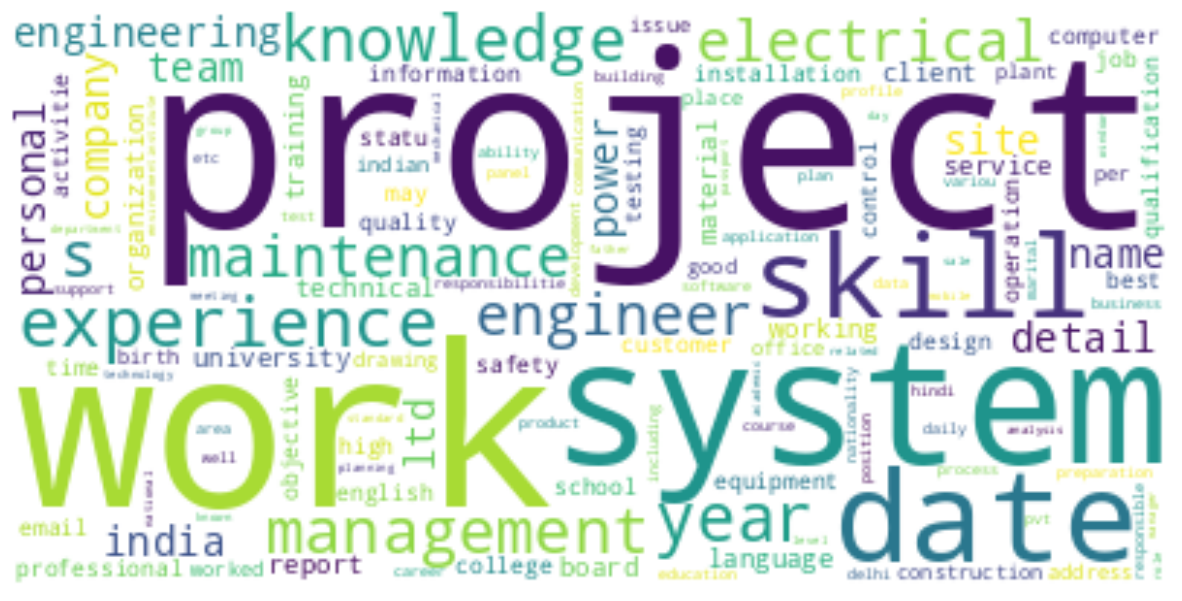

In [16]:
All_text = list(data.TEXT.astype(str))
All_text = " ".join(All_text)
word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(All_text)
plt.figure(figsize=(15,10))
plt.imshow(word_cloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

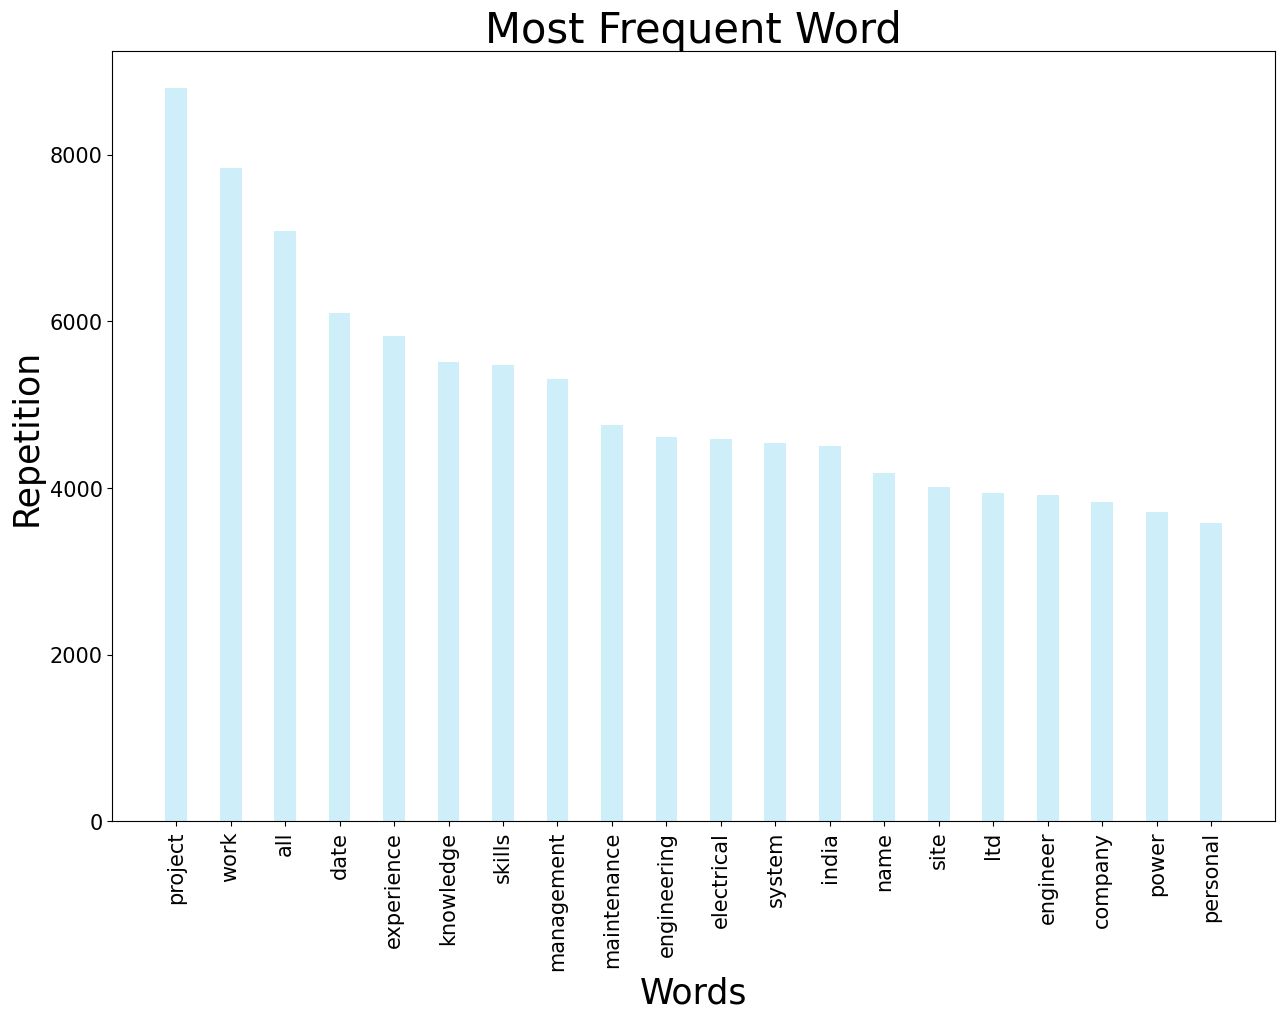

In [17]:
freq_words = get_freq_word(data.TEXT.astype(str))
freq_words.columns = ['WORD', 'COUNT']

plt.figure(figsize=(15,10))
plt.bar(freq_words.WORD[:20], freq_words.COUNT[:20], color ='#ceeffa',
        width = 0.4)
plt.xticks(rotation=90 ,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Words" , fontsize = 25)
plt.ylabel("Repetition", fontsize = 25)
plt.title("Most Frequent Word", fontsize = 30)
plt.show();

In [18]:
# cv1 = CountVectorizer(stop_words='english')
# after_cv1 = cv1.fit_transform(data.TEXT.dropna())
# cv1_df = pd.DataFrame(after_cv1.toarray(), columns=cv1.get_feature_names_out()).head()
# cv1_df

# **Count Vectorizer With grams**

In [19]:
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

after_cv2 = cv2.fit_transform(data.TEXT)
cv2_df = pd.DataFrame(after_cv2.toarray(), columns=cv2.get_feature_names_out()).head()
cv2_df

,aa,aa bb,aaaa,aaaa bring,aaaa consulting,aaaa home,aaaa mobilen,aaaa nbilingual,aaaa ntoledo,aaaa nvolunteer,...,ﬂows,ﬂows currently,ﬂows used,ﬂute,ﬂute recorder,ﬃce,ﬃce languages,ﺪﻤﺣأ,ﺪﻤﺣأ ﻢﻴﻠﺳ,ﻢﻴﻠﺳ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF-IDF Vectorizer Without grams

In [20]:
tfidf = TfidfVectorizer(stop_words='english')
doc_words = tfidf.fit_transform(data.TEXT)
tfidf_df = pd.DataFrame(doc_words.toarray(),columns=tfidf.get_feature_names_out())
tfidf_df

,aa,aaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaanundergraduate,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaangraduate,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaansenior,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaancivil,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaanelectrical,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaancivil,aaaaaaaaaaaaaaaaaaaaaaaaaaanmechanical,aaaaaaaaaaaaaaaaaaaaaaaaanchemical,...,ﬁxes,ﬂash,ﬂexible,ﬂights,ﬂow,ﬂows,ﬂute,ﬃce,ﺪﻤﺣأ,ﻢﻴﻠﺳ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
write_pickle('Count_Vectorizer_With_grams.pickle', cv2_df)
write_pickle('TF-IDF_Vectorizer_With_grams.pickle', tfidf_df)